In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

## Load Data

In [3]:
Emp_data = pd.read_csv("Dataset01-Employee_Attrition.csv")
Emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
Emp_data.shape

(14999, 10)

In [5]:
Emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
Emp_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
Emp_data[Emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
Emp_data1 = Emp_data.drop_duplicates()
Emp_data1.shape

(11991, 10)

In [10]:
Emp_data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Data Exploration and Visualization

In [11]:
Emp_data1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

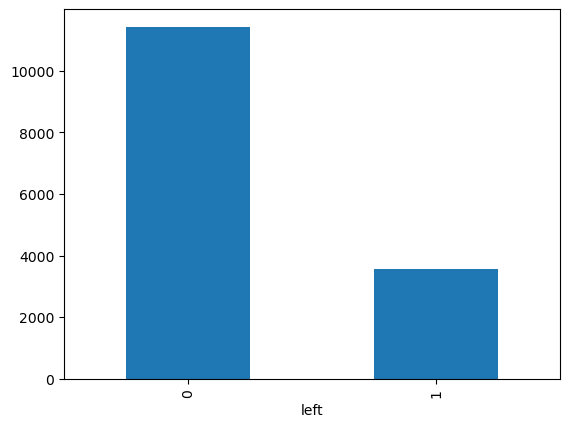

In [12]:
Emp_data['left'].value_counts().plot(kind='bar')

In [13]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
pd.crosstab(Emp_data1.salary, Emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

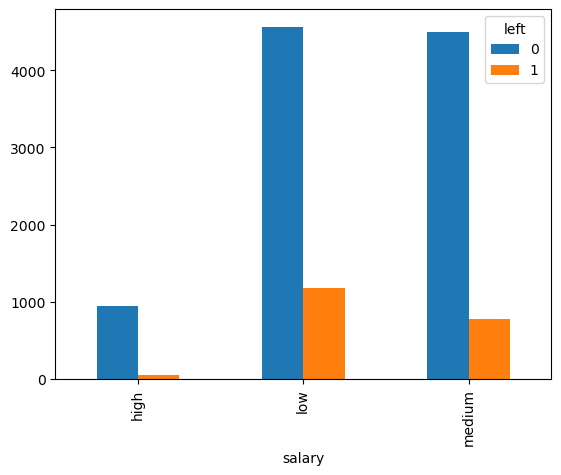

In [15]:
pd.crosstab(Emp_data1.salary, Emp_data1.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely not to leave the company

**Department wise employee retenation rate**

<Axes: xlabel='Department'>

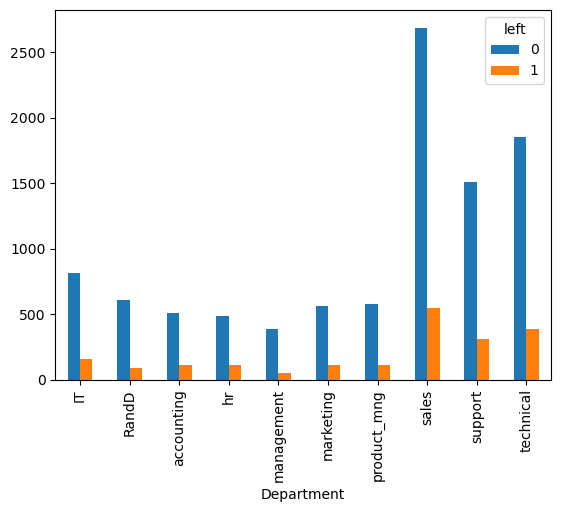

In [16]:
pd.crosstab(Emp_data1.Department, Emp_data1.left).plot(kind = 'bar')

In [17]:
pd.crosstab(Emp_data1.Department, Emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [18]:
num_feature_list1 = [f for f in Emp_data1.columns if Emp_data1.dtypes [f] == 'float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [19]:
num_feature_list1 = [f for f in Emp_data1.columns if Emp_data1.dtypes [f] == 'int64']
num_feature_list1

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [20]:
num_col_list = ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']

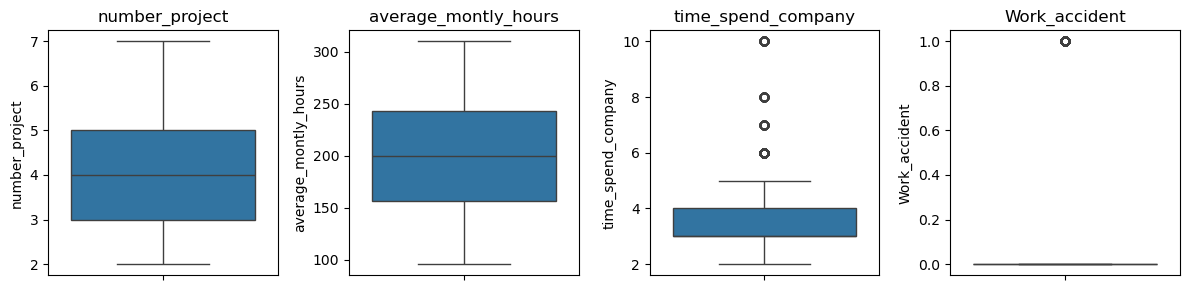

In [21]:
fig,axes = plt.subplots(ncols = 4,  figsize=(12,3))
for column, axis in zip(num_col_list[:4], axes):
    sns.boxplot(data = Emp_data1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

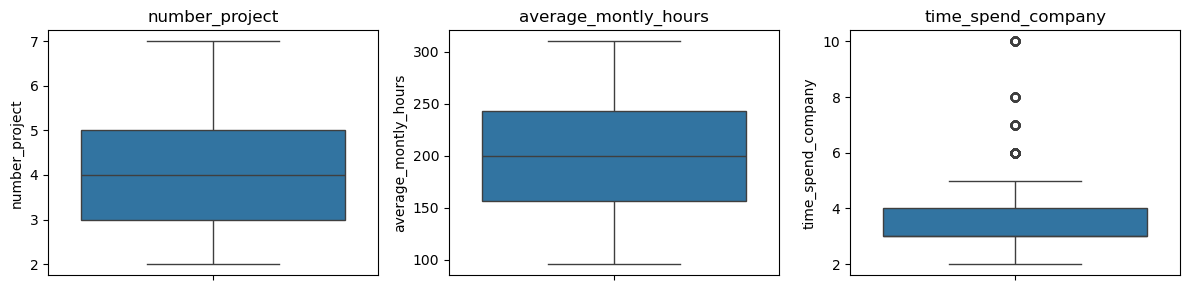

In [22]:
fig,axes = plt.subplots(ncols = 3,  figsize=(12,3))
for column, axis in zip(num_col_list[:4], axes):
    sns.boxplot(data = Emp_data1[column], ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

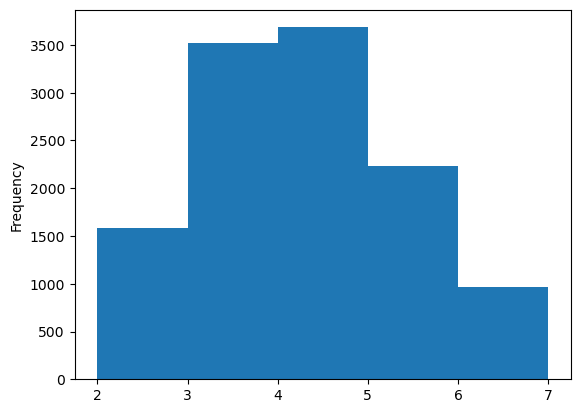

In [23]:
Emp_data1['number_project'].plot(kind= 'hist', bins = 5)

<Axes: ylabel='Frequency'>

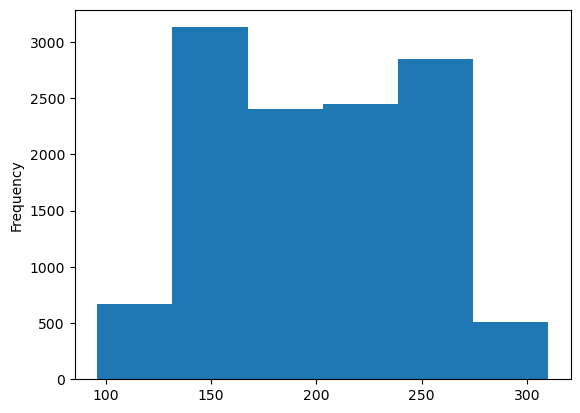

In [24]:
Emp_data1['average_montly_hours'].plot(kind= 'hist', bins = 6)

<Axes: ylabel='Frequency'>

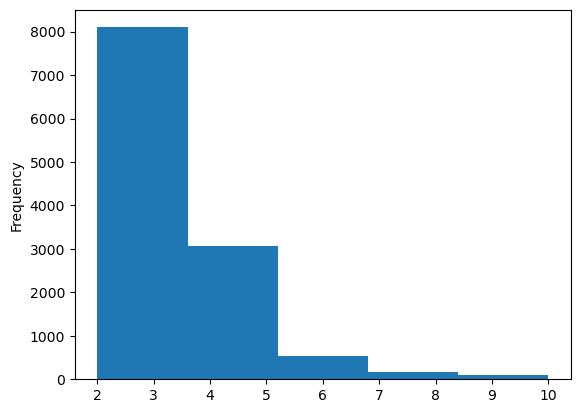

In [25]:
Emp_data1['time_spend_company'].plot(kind= 'hist', bins = 5 )

<Axes: ylabel='Frequency'>

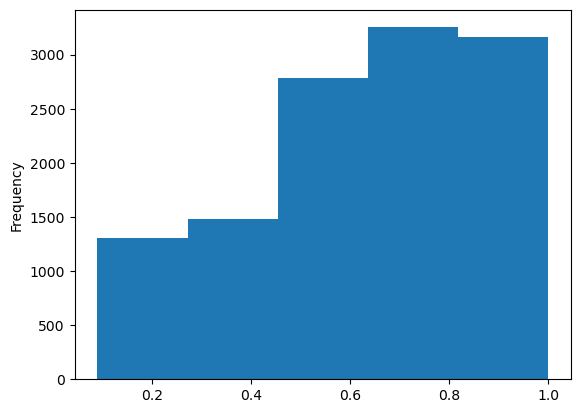

In [26]:
Emp_data1['satisfaction_level'].plot(kind= 'hist', bins = 5 )

<Axes: ylabel='Frequency'>

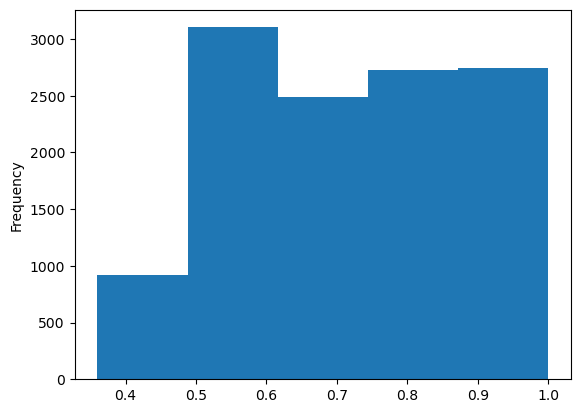

In [27]:
Emp_data1['last_evaluation'].plot(kind= 'hist', bins = 5 )

# *Feature Engineering*

**Level Encoding : Converting Categorical Features into Numerical**

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [29]:
Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])

C:\Users\Vedant Kakade\AppData\Local\Temp\ipykernel_14308\3068568613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
C:\Users\Vedant Kakade\AppData\Local\Temp\ipykernel_14308\3068568613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])


In [30]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


**Dependent(Target) and Independent Variable:**

In [31]:
X = Emp_data1.drop('left', axis = 1)
y = Emp_data1['left']

**Splitting data into Training and Testing:**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [33]:
x_train.shape

(9592, 9)

In [34]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6426,0.86,0.56,5,141,2,0,0,7,2
288,0.82,0.91,5,232,5,0,0,9,1
5051,0.62,0.52,3,148,3,0,0,7,2
11132,0.43,0.74,4,129,6,0,0,3,2
3687,0.85,0.79,3,156,3,0,0,7,2


**Feature Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [36]:
xtrain_scaled = std_scaler.fit_transform(x_train)
xtest_scaled = std_scaler.transform(x_test)

In [37]:
xtrain_scaled
xtest_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]])

## **Model Development:**

**Random Forest:**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
Random_forest_model = RandomForestClassifier()

**Model Training**

In [40]:
Random_forest_model.fit(xtrain_scaled, y_train)

RandomForestClassifier()

**Model Prediction**

In [41]:
y_pred = Random_forest_model.predict(xtest_scaled)

## **Model Evaluation**

**Confusion Matrix:**

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1991    7]
 [  40  361]]


In [ ]:
sns.heatmap(cm, annot = True, fmt= 'd')

<Axes: >

**Accuracy:**

In [ ]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model = ", model_accuracy)

**Precision:**

In [ ]:
from sklearn.metrics import precision_score
model_precision = precision_score(y_test, y_pred)
print("Precision of the model = ", model_precision)

**Recall:**

In [ ]:
from sklearn.metrics import recall_score
model_recall = recall_score(y_test, y_pred)
print("Recall of the model = ", model_recall)

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score
model_f1 = f1_score(y_test, y_pred)
print("F1- Score of the model = ", model_accuracy)

**Classcification Report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

**Feature Importance Metrix in Random Forest/Feature Extraction**

In [ ]:
score_list = Random_forest_model.feature_importances_
list_of_features = list(X.columns)
score_df= pd.DataFrame({"Feature":list_of_features, 'Score':score_list})
score_df.sort_values(by= 'Score', ascending= False)

In [ ]:
list_of_features = list(X.columns)
plt.figure(figsize = (8,6))
plt.barh(range(len(list_of_features)), Random_forest_model.feature_importances_)
plt.yticks(np.arange(len(list_of_features)), list_of_features)
plt.ylabel('Features')
plt.show()

**K-fold Cross Validation:**

In [ ]:
# Applying  5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores= cross_val_score(Random_forest_model, xtrain_scaled, y_train, cv = 5 , scoring= 'accuracy')
print('Cross-validation scores = ', scores)

In [ ]:
Avg_Model_score = scores.mean()
print(f'Average Model Score = {Avg_Model_score}')

## **Hyper Parameter Tuning:**

**Grid Search CV| Random Search CV**

In [111]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

**List of Parameters:**

In [112]:
parameters = {
    'n_estimators' :[50,100],
    'max_features' :['sqrt','log2', None]
}

**Search the Best parameters:**

In [113]:
grid_search= GridSearchCV (estimator = Random_forest_model,
                           param_grid = parameters)

In [114]:
grid_search.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

**Best Parameter**

In [115]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

**Building New Model with Best Parameter**

In [116]:
Random_forest_model_new = RandomForestClassifier(max_features='sqrt', n_estimators = 50)

In [117]:
Random_forest_model_new.fit(xtrain_scaled, y_train)

RandomForestClassifier(n_estimators=50)

**K fold Cross validations : K=5**

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new, xtrain_scaled, y_train, cv=5 , scoring= 'accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.9885357  0.98488796 0.98488008 0.98540146 0.98748697]


**Average Accuracy Score of Cross Validation**

In [120]:
Avg_Model_score = scores.mean()
print('Average Model Score=', Avg_Model_score)

Average Model Score= 0.9862384334037376


**Map the Salary**

In [121]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example data
data = {'salary': ['Low', 'Medium', 'High', 'Low', 'Medium']}
df = pd.DataFrame(data)

le = LabelEncoder()
df['salary_encoded'] = le.fit_transform(df['salary'])

print(df)

# To get the mapping:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping:", mapping)

#To inverse transform:
df['salary_original'] = le.inverse_transform(df['salary_encoded'])
print(df)

   salary  salary_encoded
0     Low               1
1  Medium               2
2    High               0
3     Low               1
4  Medium               2
Mapping: {'High': 0, 'Low': 1, 'Medium': 2}
   salary  salary_encoded salary_original
0     Low               1             Low
1  Medium               2          Medium
2    High               0            High
3     Low               1             Low
4  Medium               2          Medium
